# Gráficos:

## Quantidade de Rotas por Semana - Harvest 2025:

In [1]:
# Importando bibliotecas necessárias:
import pandas as pd # Biblioteca para manipulação de dados
import matplotlib.pyplot as plt  # Bibliotecas para manipulação de dados e visualização gráfica

In [3]:
# Lendo o arquivo Excel e criando o DataFrame df_visitas.
df_visitas = pd.read_excel(r"C:\Users\coere\OneDrive\Área de Trabalho\Rafael\Projetos\Projeto_Gráficos_Cargas_Rotas\GERAL - VISITAS.xlsx", header=1)

In [4]:
# Seleciona apenas as colunas relevantes para a análise
df_visitas = df_visitas[['ID', 'SEMANA', 'SITUAÇÃO', ' 	HOUVE CARGAS NÃO ACOMPANHADAS']]

In [6]:
df_visitas.head()  # Exibe as primeiras linhas do DataFrame para verificar os dados carregados

,ID,SEMANA,SITUAÇÃO,\tHOUVE CARGAS NÃO ACOMPANHADAS
0,KMA209549,1,Aprovada,NÃO
1,KMA209549_A,1,Aprovada,NÃO
2,KMA209550,1,Aprovada,NÃO
3,KMA209551,1,Aprovada,NÃO
4,KMA209552,1,Aprovada,NÃO


In [7]:
# Filtra apenas as visitas que foram aprovadas e que não tiveram cargas não acompanhadas
df_visitas = df_visitas[
    (df_visitas['SITUAÇÃO'] == 'Aprovada') &
    (df_visitas[' 	HOUVE CARGAS NÃO ACOMPANHADAS'] == 'NÃO')
]

In [8]:
# Remove entradas duplicadas com base no ID, mantendo apenas a primeira ocorrência
df_visitas = df_visitas.drop_duplicates(subset='ID', keep='first')

In [9]:
# Mantém apenas as visitas realizadas até a semana 19 (limitação temporal da análise)
df_visitas = df_visitas[df_visitas['SEMANA'] <= 19]

In [10]:
# Agrupa os dados por semana e conta quantas visitas únicas ocorreram por semana
total_visitas = (
    df_visitas
    .groupby('SEMANA')  # Agrupamento por semana
    .size()              # Conta o número de ocorrências (visitas)
    .reset_index(name='Total')  # Renomeia a coluna de contagem para 'Total'
)

In [11]:
# Ordena os dados pelas semanas para exibir no eixo x de forma cronológica
total_visitas = total_visitas.sort_values(by='SEMANA')

In [13]:
# Exibe o DataFrame resultante para verificar os totais por semana
total_visitas.head()  # Exibe as primeiras linhas do DataFrame para verificar os totais por semana

,SEMANA,Total
0,1,54
1,2,672
2,3,959
3,4,1236
4,5,1338


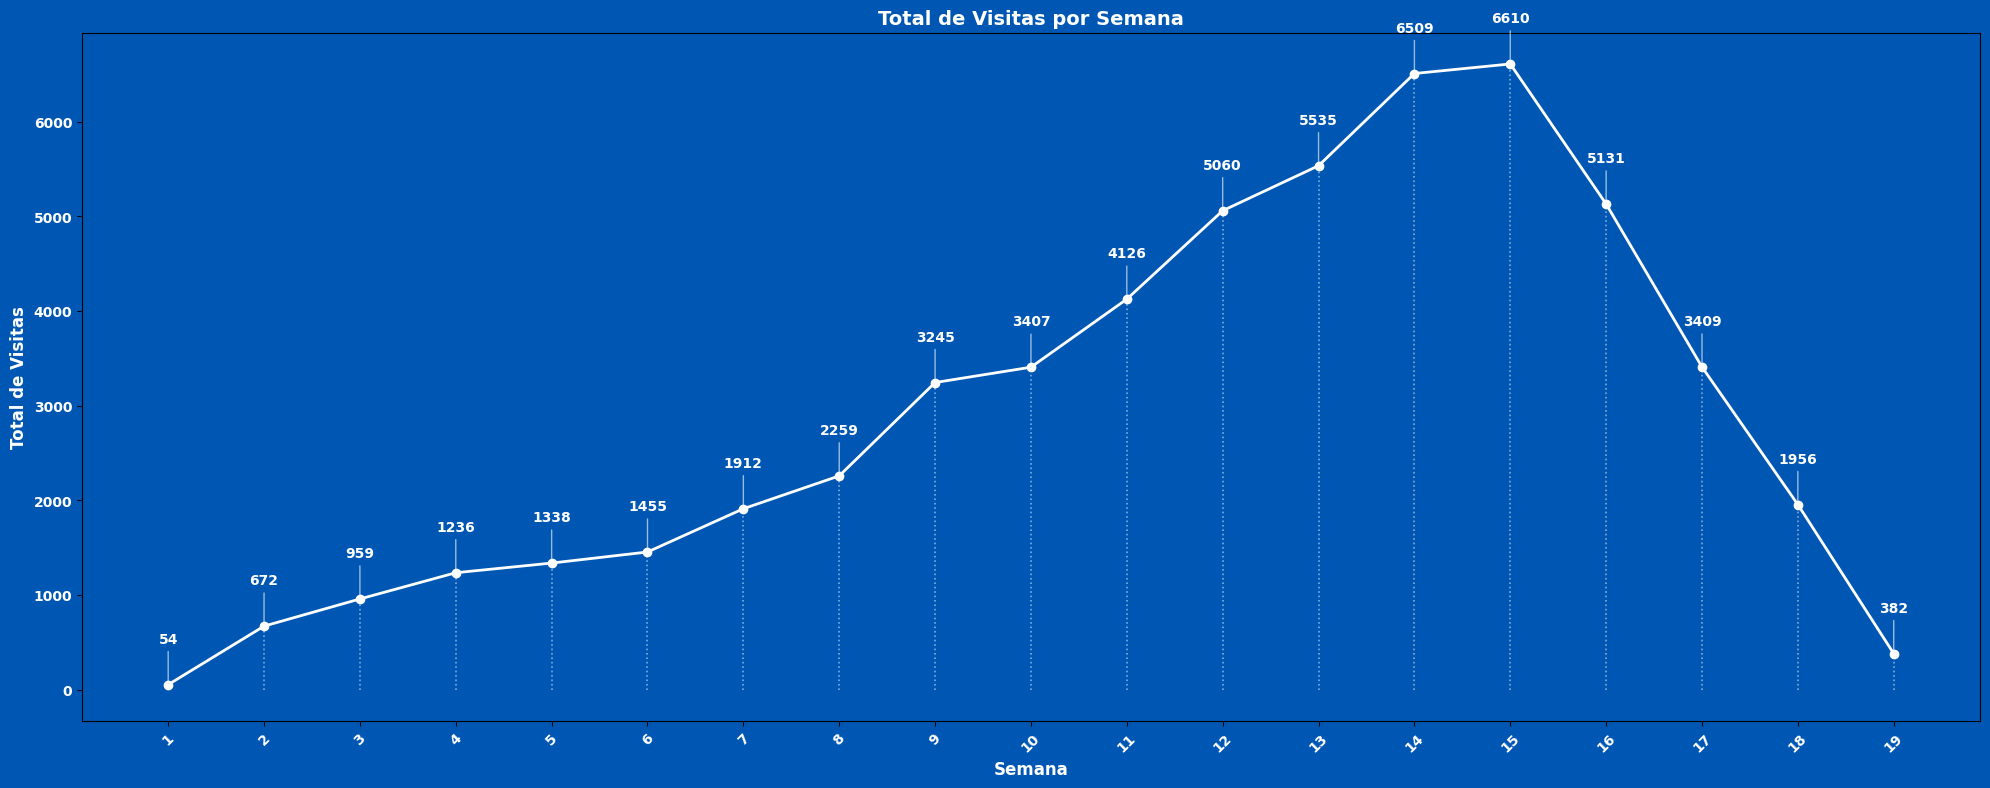

In [18]:
# Inicia a construção do gráfico com tamanho personalizado
plt.figure(figsize=(20, 8))

# Cria uma área preenchida representando o volume de visitas por semana
plt.fill_between(
    total_visitas['SEMANA'],        # eixo x: semanas
    total_visitas['Total'],         # eixo y: total de visitas
    color='#0056b3',                # cor do preenchimento (azul)
    alpha=0.7                       # transparência da área
)

# Adiciona linhas verticais pontilhadas conectando cada ponto à base do gráfico
plt.vlines(
    x=total_visitas['SEMANA'],      # posições no eixo x
    ymin=0,                         # início da linha (base do gráfico)
    ymax=total_visitas['Total'],    # fim da linha (altura da visita)
    color='white',
    linestyle='dotted',
    linewidth=1.2,
    alpha=0.5
)

# Plota a linha principal por cima da área, com marcadores brancos
plt.plot(
    total_visitas['SEMANA'],        # eixo x
    total_visitas['Total'],         # eixo y
    color='white',
    linewidth=2,
    marker='o',                     # marcador em formato de bolinha
    markersize=6,
    markerfacecolor='white',
    markeredgecolor='white'
)

# Adiciona rótulos com setas apontando para os valores das visitas
for i, txt in enumerate(total_visitas['Total']):
    plt.annotate(
        txt,                                       # valor a ser exibido
        xy=(total_visitas['SEMANA'].iloc[i],       # posição x
            total_visitas['Total'].iloc[i]),       # posição y
        xytext=(0, 30),                            # deslocamento vertical do texto
        textcoords='offset points',
        ha='center',                               # centraliza horizontalmente
        color='white',
        weight='bold',
        arrowprops=dict(                           # seta de ligação entre texto e ponto
            arrowstyle='-',
            color='white',
            linewidth=1.0,
            alpha=0.6
        )
    )

# Configurações dos eixos e título do gráfico
plt.xlabel("Semana", fontsize=12, color='white', weight='bold')                      # Rótulo do eixo x
plt.ylabel("Total de Visitas", fontsize=12, color='white', weight='bold')            # Rótulo do eixo y
plt.title("Total de Visitas por Semana", fontsize=14, color='white', weight='bold')  # Título do gráfico

# Ajustes de formatação dos números no eixo x (semana) e eixo y (visitas)
plt.xticks(total_visitas['SEMANA'], fontsize=10, color='white', weight='bold', rotation=45)
plt.yticks(fontsize=10, color='white', weight='bold')

plt.grid(False)  # Remove a grade de fundo

# Define cores de fundo do gráfico (área do gráfico e da figura)
ax = plt.gca()
ax.set_facecolor('#0056b3')              # Cor de fundo da área interna
plt.gcf().patch.set_facecolor('#0056b3') # Cor de fundo da figura como um todo

# Ajusta automaticamente os elementos para não cortarem na visualização
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()

In [ ]:
"""
Portanto podemos concluir que o gráfico gerado representa o total de visitas por semana, com destaque para as semanas em que não houve cargas não acompanhadas. 
As setas indicam os valores exatos de visitas em cada semana, proporcionando uma visualização clara e informativa do desempenho ao longo do tempo.
Fica claro que o pico da safra ocorreu entre as semanas 15 e 16, com um total de 6.509 mil e 6610 mil visitas respectivamente, na sequência a safra começa a cair.
O gráfico é útil para identificar tendências e padrões nas visitas ao longo das semanas, permitindo uma análise mais aprofundada do desempenho e da eficiência das operações.
"""

## Quantidade de Cargas por Semana - Harvest 2025:

In [19]:
# Lendo o arquivo Excel e criando o DataFrame df_visitas.
df_cargas = pd.read_excel(r"C:\Users\coere\OneDrive\Área de Trabalho\Rafael\Projetos\Projeto_Gráficos_Cargas_Rotas\GERAL - CARGAS.xlsx", header=1)

In [20]:
# Importando bibliotecas necessárias:
import pandas as pd             # Biblioteca para manipulação de dados.
import matplotlib.pyplot as plt # Bibliotecas para manipulação de dados e visualização gráfica.

In [21]:
# Selecionando apenas as colunas relevantes para o gráfico
df_cargas = df_cargas[['ID', 'DATA', 'NÃO ACOMPANHADA', 'TIPO DA VISITA']]

In [24]:
# Convertendo a coluna 'DATA' para o formato datetime para garantir que as operações de data sejam corretas
df_cargas['DATA'] = pd.to_datetime(df_cargas['DATA'], dayfirst=True)

In [25]:
# Extraindo a semana do ano a partir da data para agregação
df_cargas['SEMANA'] = df_cargas['DATA'].dt.isocalendar().week

In [26]:
# Filtrando as cargas que não estão "Acompanhadas" e cujo tipo de visita é "Presencial"
df_cargas = df_cargas[
    (df_cargas['NÃO ACOMPANHADA'] == 'Não') &
    (df_cargas['TIPO DA VISITA'] == 'Presencial')
]

In [27]:
# Removendo registros duplicados com base no 'ID', mantendo a primeira ocorrência
df_cargas = df_cargas.drop_duplicates(subset='ID', keep='first')

In [28]:
# Definindo o intervalo de datas (de 01/01/2025 até o dia anterior)
inicio = pd.to_datetime('2025-01-01')
fim = pd.Timestamp.today() - pd.Timedelta(days=1)  # Data de ontem

# Filtrando as cargas que estão dentro do intervalo de datas definido
df_cargas = df_cargas[(df_cargas['DATA'] >= inicio) & (df_cargas['DATA'] <= fim)]

In [29]:
# Agrupando os dados por semana e contando o total de cargas únicas por semana
total_cargas = (
    df_cargas
    .groupby('SEMANA')
    .size()
    .reset_index(name='Total')
)

In [30]:
# Ordenando os dados pela semana para garantir a sequência temporal
total_cargas = total_cargas.sort_values(by='SEMANA')

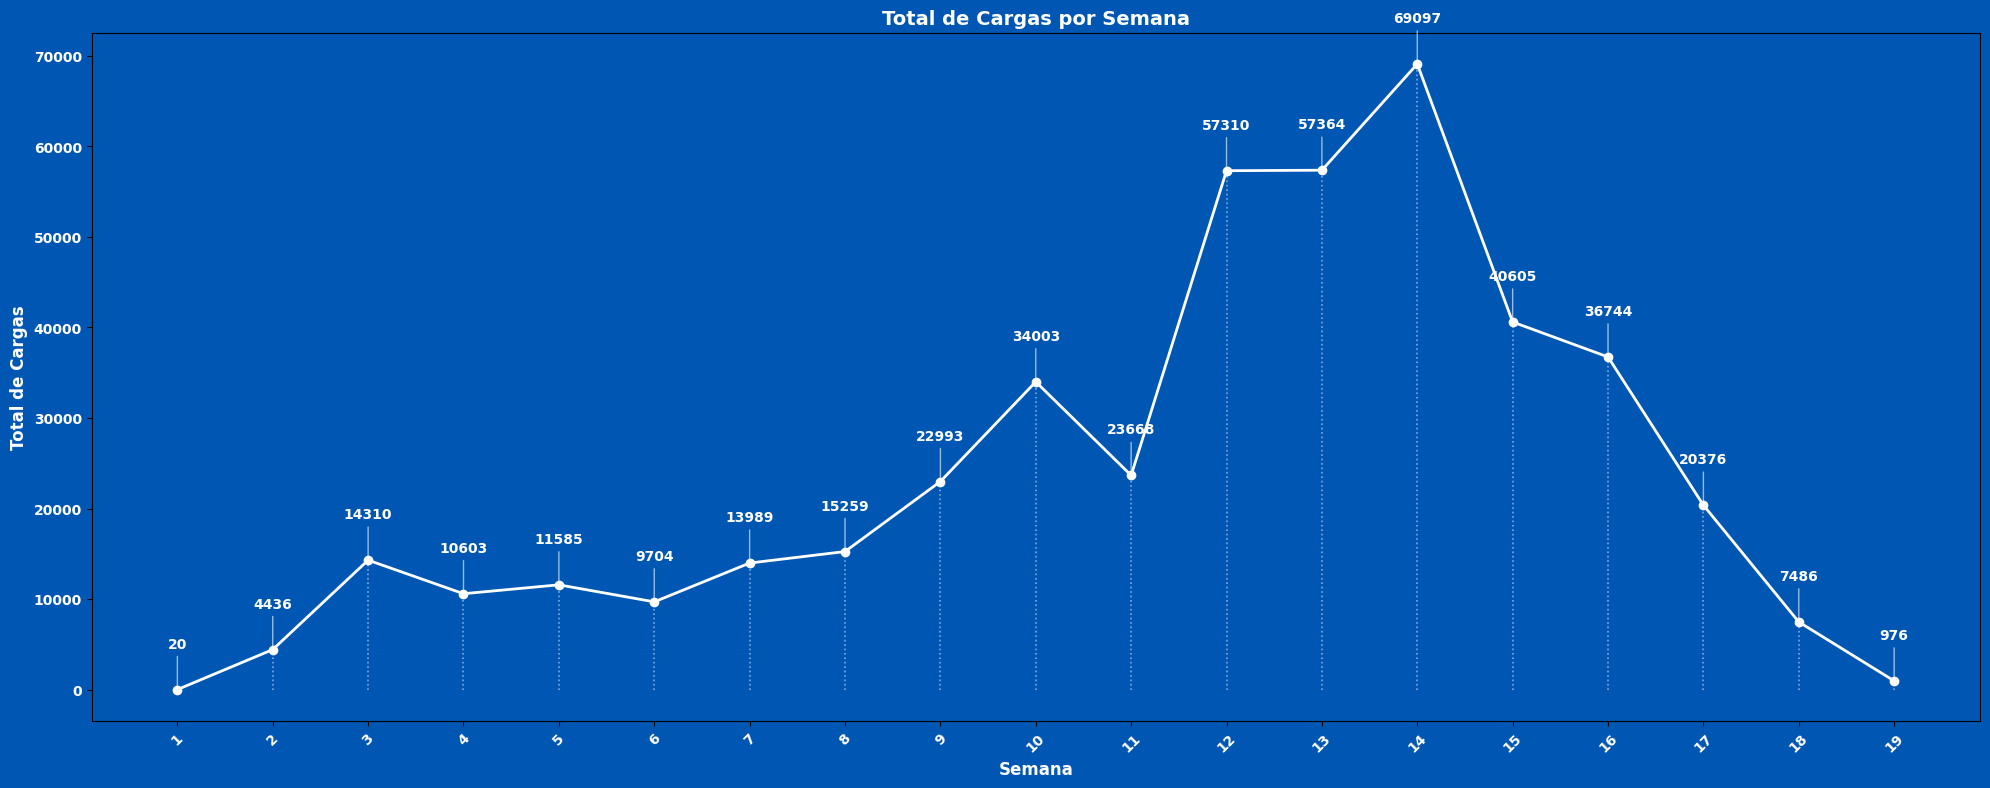

In [31]:
# Criando o gráfico de área, preenchendo a área sob a linha com uma cor azul
plt.figure(figsize=(20, 8))
plt.fill_between(
    total_cargas['SEMANA'],
    total_cargas['Total'],
    color='#0056b3',  # Cor personalizada
    alpha=0.7  # Transparência da área
)

# Adicionando linhas verticais pontilhadas que conectam os pontos da linha principal à base do gráfico
plt.vlines(
    x=total_cargas['SEMANA'],
    ymin=0,
    ymax=total_cargas['Total'],
    color='white',
    linestyle='dotted',
    linewidth=1.2,  # Espessura da linha
    alpha=0.5  # Transparência das linhas
)

# Plotando a linha principal com marcadores em forma de bolinhas brancas
plt.plot(
    total_cargas['SEMANA'],
    total_cargas['Total'],
    color='white',  # Cor da linha principal
    linewidth=2,  # Espessura da linha
    marker='o',  # Tipo de marcador
    markersize=6,  # Tamanho do marcador
    markerfacecolor='white',  # Cor de preenchimento do marcador
    markeredgecolor='white'  # Cor da borda do marcador
)

# Adicionando rótulos ao gráfico, com setas apontando para os pontos específicos
for i, txt in enumerate(total_cargas['Total']):
    plt.annotate(
        txt,  # O texto (valor da carga) será mostrado
        xy=(total_cargas['SEMANA'].iloc[i], total_cargas['Total'].iloc[i]),  # Coordenadas do ponto
        xytext=(0, 30),  # Deslocamento do texto
        textcoords='offset points',  # Coordenadas relativas ao ponto
        ha='center',  # Alinhamento horizontal
        color='white',  # Cor do texto
        weight='bold',  # Peso da fonte
        arrowprops=dict(arrowstyle='-', color='white', linewidth=1.0, alpha=0.6)  # Estilo da seta
    )

# Configurações adicionais de estilo e formatação do gráfico
plt.xlabel("Semana", fontsize=12, color='white', weight='bold')  # Rótulo do eixo X
plt.ylabel("Total de Cargas", fontsize=12, color='white', weight='bold')  # Rótulo do eixo Y
plt.title("Total de Cargas por Semana", fontsize=14, color='white', weight='bold')  # Título do gráfico
plt.xticks(total_cargas['SEMANA'], fontsize=10, color='white', weight='bold', rotation=45)  # Rótulos do eixo X
plt.yticks(fontsize=10, color='white', weight='bold')  # Rótulos do eixo Y
plt.grid(False)  # Remover grade do fundo

# Definindo cores de fundo personalizadas
ax = plt.gca()
ax.set_facecolor('#0056b3')  # Cor de fundo do gráfico
plt.gcf().patch.set_facecolor('#0056b3')  # Cor de fundo da figura

# Ajustando o layout para que o gráfico fique bem posicionado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
"""
Portanto podemos concluir que o gráfico gerado representa o total de cargas por semana, com destaque para as semanas em que não houve cargas não acompanhadas. 
As setas indicam os valores exatos de cargas em cada semana, proporcionando uma visualização clara e informativa do desempenho ao longo do tempo.
Fica claro que o pico da safra ocorreu entre as semanas 12, 13 e 14, com um total de 57.310, 57.364 e 69.097 mil cargas respectivamente, na sequência a safra começa a cair.
O gráfico é útil para identificar tendências e padrões nas cargas ao longo das semanas, permitindo uma análise mais aprofundada do desempenho e da eficiência das operações.
"""